# Stoneburner, Kurt
- ## DSC 640 - Week XX

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

Heatmaps Reference: https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
GeoSpatial Refernce: https://www.datacamp.com/community/tutorials/geospatial-data-python


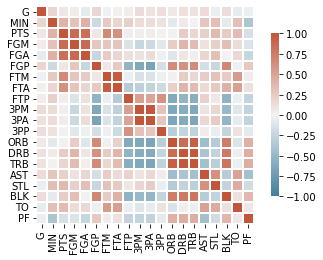

In [2]:
bb_df = pd.read_csv("./wk0910/z_wk09_10_ppg2008.csv")


fig,ax = plt.subplots()

# Define a nice color map for our heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=bb_df.corr(),  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    )
# adjust y-axis ticks for legibility
plt.yticks(rotation=0)  
# show the heatmap
plt.show()

In [3]:
# //*** CODE HERE


bb_df.sort_values("G",ascending=False).set_index("Name  ").style.background_gradient(cmap ='cividis')\
    .set_properties(**{'font-size': '10px'})



,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Ben Gordon,82,36.600000,20.700000,7.300000,16.000000,0.455000,4.000000,4.700000,0.864000,2.100000,5.100000,0.410000,0.600000,2.800000,3.500000,3.400000,0.900000,0.300000,2.400000,2.200000
O.J. Mayo,82,38.000000,18.500000,6.900000,15.600000,0.438000,3.000000,3.400000,0.879000,1.800000,4.600000,0.384000,0.700000,3.100000,3.800000,3.200000,1.100000,0.200000,2.800000,2.500000
Kobe Bryant,82,36.200000,26.800000,9.800000,20.900000,0.467000,5.900000,6.900000,0.856000,1.400000,4.100000,0.351000,1.100000,4.100000,5.200000,4.900000,1.500000,0.500000,2.600000,2.300000
Richard Jefferson,82,35.900000,19.600000,6.500000,14.900000,0.439000,5.100000,6.300000,0.805000,1.400000,3.600000,0.397000,0.700000,3.900000,4.600000,2.400000,0.800000,0.200000,2.000000,3.100000
Andre Iguodala,82,39.800000,18.800000,6.600000,14.000000,0.473000,4.600000,6.400000,0.724000,1.000000,3.200000,0.307000,1.100000,4.600000,5.700000,5.300000,1.600000,0.400000,2.700000,1.900000
LeBron James,81,37.700000,28.400000,9.700000,19.900000,0.489000,7.300000,9.400000,0.780000,1.600000,4.700000,0.344000,1.300000,6.300000,7.600000,7.200000,1.700000,1.100000,3.000000,1.700000
Pau Gasol,81,37.100000,18.900000,7.300000,12.900000,0.567000,4.200000,5.400000,0.781000,0.000000,0.000000,0.500000,3.200000,6.400000,9.600000,3.500000,0.600000,1.000000,1.900000,2.100000
Antawn Jamison,81,38.200000,22.200000,8.300000,17.800000,0.468000,4.200000,5.600000,0.754000,1.400000,3.900000,0.351000,2.400000,6.500000,8.900000,1.900000,1.200000,0.300000,1.500000,2.700000
Paul Pierce,81,37.400000,20.500000,6.700000,14.600000,0.457000,5.700000,6.800000,0.830000,1.500000,3.800000,0.391000,0.700000,5.000000,5.600000,3.600000,1.000000,0.300000,2.800000,2.700000


In [4]:
costco_df = pd.read_csv("./wk0910/z_wk09_10_costcos-geocoded.csv")
costco_df




costco_df['coordinates'] = costco_df[['Longitude', 'Latitude']].values.tolist()
costco_df['coordinates'] = costco_df['coordinates'].apply(Point)
geo_costco_df = gpd.GeoDataFrame(costco_df, geometry='coordinates')
#geo_costco_df = geo_costco_df[geo_costco_df['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False]

tdf = pd.DataFrame(costco_df.groupby('State').nunique()['Zip Code'])
tdf = tdf.reset_index()
tdf.columns = ['State',"count"]


tdf.loc[tdf[f"count"] > tdf['count'].mean(),f"count"]=10
tdf

,State,count
0,Alabama,3
1,Alaska,3
2,Arizona,10
3,California,10
4,Colorado,10
5,Connecticut,5
6,Delaware,1
7,Florida,10
8,Georgia,9
9,Hawaii,7


In [5]:
geo_costco_df

,Address,City,State,Zip Code,Latitude,Longitude,coordinates
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (-86.60096 34.74309)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (-86.81242 33.37765)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (-86.15088 32.36389)
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,POINT (-134.48300 58.35920)
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,POINT (-149.88422 61.14327)
...,...,...,...,...,...,...,...
412,19610 SE 1st St,Vancouver,Washington,98607,45.621299,-122.459135,POINT (-122.45913 45.62130)
413,10990 Harbor Hill Dr,Gig Harbor,Washington,98335,47.357748,-122.603888,POINT (-122.60389 47.35775)
414,27520 Covington Way SE,Covington,Washington,98042,47.354838,-122.121185,POINT (-122.12118 47.35484)
415,2150 Deming Way,Middleton,Wisconsin,53562-5507,43.100195,-89.522751,POINT (-89.52275 43.10019)


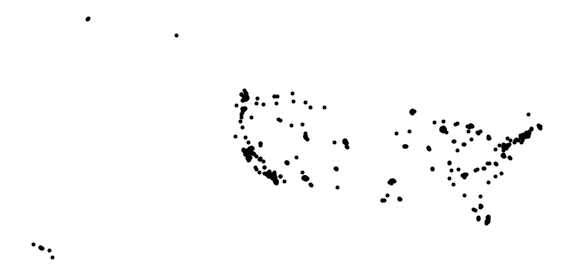

In [7]:
#//*** Initialize the subplots
fig, ax = plt.subplots()

#//*** Size the plot
fig = plt.gcf()
fig.set_size_inches(10,5)


geo_costco_df.plot(ax=ax, marker=".",color="black")

plt.show()

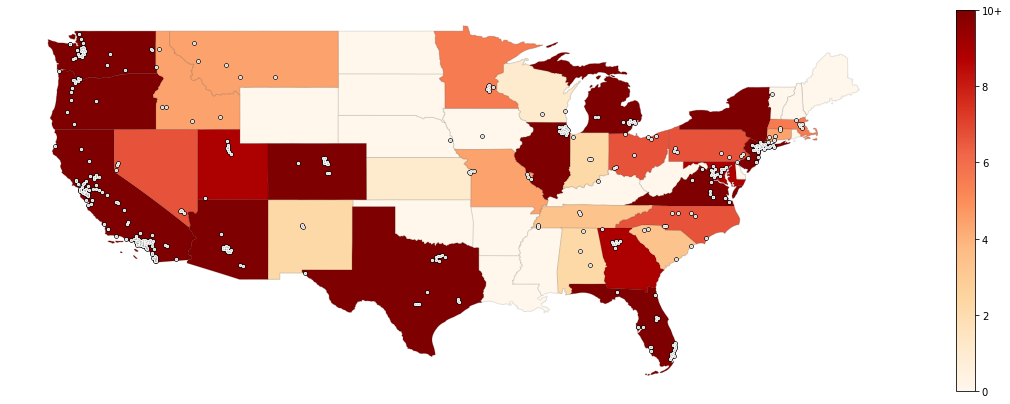

In [47]:
states = gpd.read_file('maps\cb_2018_us_state_20m.shp')
states = states[states['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False]
geo_costco_df = geo_costco_df[geo_costco_df['State'].isin(['Alaska','Hawaii','Puerto Rico']) == False]
states['base'] = 0


rankings_df = states.merge(tdf,left_on='NAME',right_on='State')
color_map = "YlOrRd"
color_map = "OrRd"
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(color_map), norm=plt.Normalize(vmin=0, vmax=10))

#//*** Initialize the subplots
fig, ax = plt.subplots()

#//*** Size the plot
fig = plt.gcf()
fig.set_size_inches(20,10)


sm._A = []

cbar = fig.colorbar(sm,shrink=.7,ticks=[0,2,4,6,8,10])
cbar.ax.set_yticklabels(["0","2","4","6","8","10+"])

ax=states.plot(column='base', cmap=plt.get_cmap(color_map), edgecolor=(0,0,0,.1), ax=ax,)
ax=rankings_df.plot(column='count', cmap=plt.get_cmap(color_map), edgecolor=(0,0,0,.1), ax=ax)

##plot_df.plot(column=f'{date}_scaled_100k', ax=ax,linewidth=0.3,cmap=plt.get_cmap(color_map),edgecolor=(1,1,1,.2))

ax=geo_costco_df.plot(ax=ax, marker=".",color="black", markersize=50)
ax=geo_costco_df.plot(ax=ax, marker=".",color="white", markersize=20)
ax=geo_costco_df.plot(ax=ax, marker=".",color=(0,0,0,.2), markersize=1)
ax.axis('off')
plt.show()

In [ ]:
rankings_df